<a href="https://colab.research.google.com/github/Nomade25/Mackenzie/blob/main/AnaliseWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# importando bibliotecas

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from google.colab import files 
from statsmodels import robust
import seaborn as sns
import matplotlib.pylab as plt
pip install wquantiles

In [11]:
# Aqui realiza a leitura do arquivo winequality que foi importado para o colab

df_uva=  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Arquivos/winequality-red.csv")

In [12]:
# Lendo as primeiras Linhas do dataSet


df_uva.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
# Lendo os tipos de dados do DataSet
# temos todas variaveis armazenadas como float  não sendo necessário transformaçao para a analise


df_uva.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [14]:
# Verificando missing values para tratamento
# POdemos concluir que essa base não possui colunas com valores vazios

(df_uva.isnull().sum()).sort_values(ascending=False)

quality                 0
alcohol                 0
sulphates               0
pH                      0
density                 0
total sulfur dioxide    0
free sulfur dioxide     0
chlorides               0
residual sugar          0
citric acid             0
volatile acidity        0
fixed acidity           0
dtype: int64

In [15]:
# Esse comando descreve os dados analisando:
# Contagem de atributos 1599
# Média, medianada, Min, Máx, quartil (25, 50 e 75)


# Aqui podemos tirar algumas analises explorátorio, por exemplo:
# As caracteriscas do vinho que tem a maior qualidade (nota 8) contém uma taxa maior de alcool (14,9),  e baixa taxa de cloreto em relação a média.
# o Nivel de PH para um vinho de excelente qualidade está em 4.01, podemos considerar essa feature como importante
# O Vinho de pior qualidade contém uma baixa taxa de Volaticidade e acidez e densidade baixa a média é (0.996747)
# Os vinhos com nota 5 e 6 possuem caracteristica caracteristicas parecidas nas faixas densidade, PH e Alcool
# Mediana está bem proximo da média, o que signfica que esta base já foi ajustada

round(df_uva.describe(),4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000
mean,8.3196,0.5278,0.2710,2.5388,0.0875,15.8749,46.4678,0.9967,3.3111,0.6581,10.4230,5.6360
std,1.7411,0.1791,0.1948,1.4099,0.0471,10.4602,32.8953,0.0019,0.1544,0.1695,1.0657,0.8076
min,4.6000,0.1200,0.0000,0.9000,0.0120,1.0000,6.0000,0.9901,2.7400,0.3300,8.4000,3.0000
25%,7.1000,0.3900,0.0900,1.9000,0.0700,7.0000,22.0000,0.9956,3.2100,0.5500,9.5000,5.0000
50%,7.9000,0.5200,0.2600,2.2000,0.0790,14.0000,38.0000,0.9968,3.3100,0.6200,10.2000,6.0000
75%,9.2000,0.6400,0.4200,2.6000,0.0900,21.0000,62.0000,0.9978,3.4000,0.7300,11.1000,6.0000
max,15.9000,1.5800,1.0000,15.5000,0.6110,72.0000,289.0000,1.0037,4.0100,2.0000,14.9000,8.0000


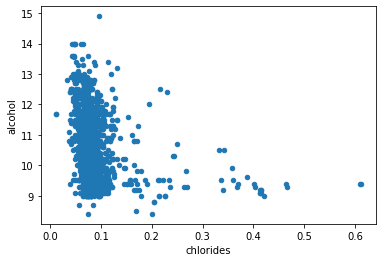

In [17]:
# Conforme citado acima os vinhos que possui alto teor alcolico (acima de 15%), possuem cloreto baixo (<0,1),
# com isso pode ter uma correlação entre essas duas variáveis com qualidade do vinho, abaixo plotamos esse gráfico de dispersão:

df_uva.plot.scatter("chlorides","alcohol");

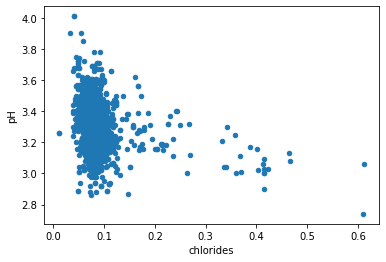

In [18]:
# Também observamos que o vinho com um pH alto possui baixa taxa de cloreto, ou seja, existe uma relação direta com a qualidade essas duas feature tb.
df_uva.plot.scatter("chlorides","pH");

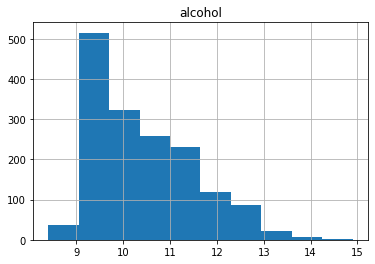

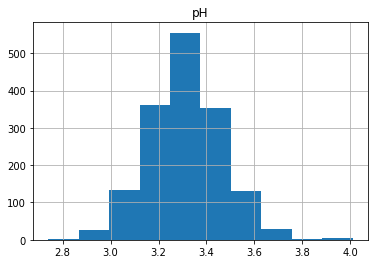

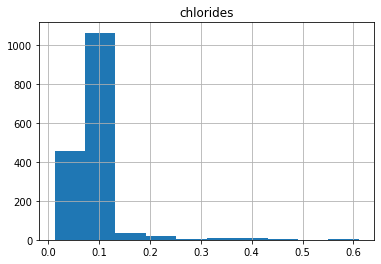

In [19]:
# Aqui podemos criar alguns histogramas da base e indentificar a seguinte analises:

#  Das 1599 ocorrencias temos um agrupamento entre 9 e 10 vol de alcool, sendo que o melhor vinho esta na faixa acima de 14% vol
#  o pH esta centralizado entre 3.2 e 3.4 da base de dados, sendo que um pH alto 4,0 é considerado um bom parametro para uma qualidade alta no vinho.
#  O nivel aceitado de cloreto está entre 0 e 0,1, indicando que vinhos com qualidade possui menor nivel possivel

df_uva.hist("alcohol");
df_uva.hist("pH");
df_uva.hist("chlorides");

# CONCLUSÂO:
#### Podemos concluir inicialmente que as variaveis como:
##volume do alcool alto,
### pH centralizado e Cloreto baixo, são variaveis determinantes para qualidade do vinho ser elevada